---
# Tasks (Deadline: Sunday 30th Nov 2025)

Complete the following tasks to practice implementing gradient descent for linear regression.

In [ ]:
# IN-CLASS TASK:
import numpy as np

np.random.seed(42)

true_weights = np.array([2.0, -3.5, 1.5])
true_bias = 5.0

n_samples = 1000
n_features = 3
X = np.random.randn(n_samples, n_features)

noise = np.random.randn(n_samples) * 0.5
y = X @ true_weights + true_bias + noise

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"True weights: {true_weights}")
print(f"True bias: {true_bias}")


def predict(X: np.ndarray, w: np.ndarray, b: float) -> np.ndarray:
    return X @ w + b


def compute_mse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    diff = y_pred - y_true
    return float(np.mean(diff ** 2))


def compute_gradients(X: np.ndarray, y: np.ndarray, y_pred: np.ndarray) -> tuple:
    n_samples = X.shape[0]
    error = y_pred - y
    gradient_w = (2.0 / n_samples) * (X.T @ error)
    gradient_b = (2.0 / n_samples) * np.sum(error)
    return gradient_w, float(gradient_b)


w = np.zeros(n_features)
b = 0.0

print("Shapes:", X.shape, w.shape)

y_pred = predict(X, w, b)
grad_w, grad_b = compute_gradients(X, y, y_pred)

print("Initial gradient w:", grad_w)
print("Initial gradient b:", grad_b)

X shape: (1000, 3)
y shape: (1000,)
True weights: [ 2.  -3.5  1.5]
True bias: 5.0
Shapes: (1000, 3) (3,)
Initial gradient w: [-4.61089207  7.28473268 -3.01277561]
Initial gradient b: -10.38398487762408


## Task 1: Implement Mini-Batch Gradient Descent

Instead of using all samples in each iteration (batch gradient descent), implement **mini-batch gradient descent** which uses a random subset of samples.

Formally said, choose $X_b$ and its corresponding $y_b$ which is a subset of $row(X), row(y)$ to be trained for each iteration.


Benefits of mini-batch:
- Faster iterations
- Can escape local minima
- Better generalization

```python
# Expected usage:
w, b, losses = train_minibatch_gd(X, y, batch_size=32, learning_rate=0.01, n_iterations=1000)
```

In [ ]:
def train_minibatch_gd(
    X: np.ndarray,
    y: np.ndarray,
    batch_size: int = 32,
    learning_rate: float = 0.01,
    n_iterations: int = 1000,
    verbose: bool = True,
    log_every_n_step: int = 20,
) -> tuple:
    """
    Train linear regression using mini-batch gradient descent.
    
    Hints:
    - Use np.random.choice to select random indices
    - Compute gradients using only the selected samples
    """
    n_samples, n_features = X.shape
    
    w = np.random.randn(n_features) * 0.01
    b = 0.0
    
    loss_history = []
    
    for i in range(n_iterations):
        batch_indices = np.random.choice(n_samples, size=min(batch_size, n_samples), replace=False)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        
        y_pred = predict(X_batch, w, b)
        loss = compute_mse(y_batch, y_pred)
        loss_history.append(loss)
        
        grad_w, grad_b = compute_gradients(X_batch, y_batch, y_pred)
        w -= learning_rate * grad_w
        b -= learning_rate * grad_b
        
        if verbose and (i % log_every_n_step == 0 or i == n_iterations - 1):
            print(f"Iteration {i:4d} | Loss: {loss:.6f}")
    
    return w, b, loss_history


In [ ]:
_, _, loss_history = train_minibatch_gd(
    X, y,
    batch_size=64,
    learning_rate=0.01,
    n_iterations=200,
    log_every_n_step=50
)

## Task 2: Implement Learning Rate Scheduling

Implement a training function that **decreases the learning rate** over time. This helps converge more precisely at the end of training.

Common schedules:
- Step decay: $\alpha_t = \alpha_0 \cdot 0.9^{\lfloor t/100 \rfloor}$
- Exponential decay: $\alpha_t = \alpha_0 \cdot e^{-kt}$
- Inverse time: $\alpha_t = \frac{\alpha_0}{1 + k \cdot t}$

where $t$ is number of current step/iteration and $k$ is the decay constant

In [6]:
def train_with_lr_schedule(
    X: np.ndarray,
    y: np.ndarray,
    initial_lr: float = 0.1,
    schedule: str = 'exponential',
    n_iterations: int = 1000,
    decay_constant: float = 0.0001,
) -> tuple:
    """
    Train with learning rate scheduling.
    
    Implement at least one scheduling strategy.
    """
    n_samples, n_features = X.shape
    w = np.random.randn(n_features) * 0.01
    b = 0.0
    
    loss_history = []
    for i in range(n_iterations):
        if schedule == 'step':
            learning_rate = initial_lr * (0.9 ** (i // 100))
        elif schedule == 'exponential':
            learning_rate = initial_lr * np.exp(-decay_constant * i)
        elif schedule == 'inverse':
            learning_rate = initial_lr / (1.0 + decay_constant * i)
        else:
            learning_rate = initial_lr

        y_pred = predict(X, w, b)
        loss = compute_mse(y, y_pred)
        loss_history.append(loss)

        grad_w, grad_b = compute_gradients(X, y, y_pred)
        w -= learning_rate * grad_w
        b -= learning_rate * grad_b

    return w, b, loss_history

print("Step decay:")
_, _, loss_history_step = train_with_lr_schedule(
    X, y,
    initial_lr=0.01,
    schedule='step',
    n_iterations=500,
    decay_constant=0.0001
)
print("Final loss (step):", loss_history_step[-1])

print("\nExponential decay:")
_, _, loss_history_exp = train_with_lr_schedule(
    X, y,
    initial_lr=0.01,
    schedule='exponential',
    n_iterations=500,
    decay_constant=0.0001
)
print("Final loss (exp):", loss_history_exp[-1])

print("\nInverse time decay:")
_, _, loss_history_inv = train_with_lr_schedule(
    X, y,
    initial_lr=0.01,
    schedule='inverse',
    n_iterations=500,
    decay_constant=0.0001
)
print("Final loss (inv):", loss_history_inv[-1])


Step decay:
Final loss (step): 0.2628572018044011

Exponential decay:
Final loss (exp): 0.26285546593105097

Inverse time decay:
Final loss (inv): 0.26285546432442186


## Task 3: Add Regularization (Ridge Regression)

Implement **L2 regularization** (Ridge regression) to prevent overfitting.

The loss function becomes:
$$\mathcal{L} = \mathcal{L}_{MSE} + \lambda \sum w_i^2$$

The gradient for weights becomes:
$$\frac{\partial Loss}{\partial w} = \frac{\partial MSE}{\partial w} + 2\lambda w$$

where $\lambda$ is the regularization constant and $w_i$ is the weight value of corresponding feature $i$

In [ ]:
import numpy as np

def calculate_ridge_loss(y_true: np.ndarray, y_pred: np.ndarray, w: np.ndarray, reg_lambda: float) -> float:
    mse = compute_mse(y_true, y_pred)
    l2_term = reg_lambda * np.sum(w ** 2)
    return float(mse + l2_term)


def calculate_ridge_gradients(X: np.ndarray, y: np.ndarray, y_pred: np.ndarray, w: np.ndarray, reg_lambda: float) -> tuple:
    n_samples = X.shape[0]
    error = y_pred - y
    grad_w = (2.0 / n_samples) * (X.T @ error) + 2.0 * reg_lambda * w
    grad_b = (2.0 / n_samples) * np.sum(error)
    return grad_w, float(grad_b)


def train_ridge_regression(
    X: np.ndarray,
    y: np.ndarray,
    learning_rate: float = 0.01,
    reg_lambda: float = 0.1,
    n_iterations: int = 1000
) -> tuple:
    n_samples, n_features = X.shape
    w = np.random.randn(n_features) * 0.01
    b = 0.0

    loss_history = []
    for _ in range(n_iterations):
        y_pred = predict(X, w, b)
        loss = calculate_ridge_loss(y, y_pred, w, reg_lambda)
        loss_history.append(loss)

        grad_w, grad_b = calculate_ridge_gradients(X, y, y_pred, w, reg_lambda)
        w -= learning_rate * grad_w
        b -= learning_rate * grad_b

    return w, b, loss_history


In [9]:
_, _, _ =train_ridge_regression(
    X, y,
    learning_rate=0.01,
    reg_lambda=0.1,
    n_iterations=500
)

## Bonus Task: Implement Stochastic Gradient Descent (SGD)

Implement pure SGD where you update weights after **each individual sample** (batch_size=1).

Compare the convergence behavior of:
1. Batch GD (all samples)
2. Mini-batch GD (e.g., 32 samples)
3. SGD (1 sample)

Plot the loss curves for all three on the same graph.

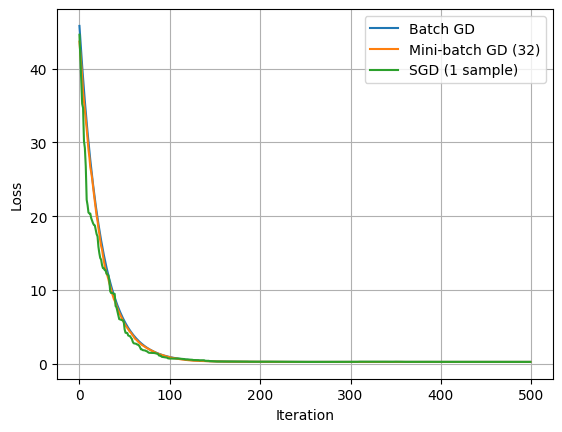

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def train_batch_gd(
    X: np.ndarray,
    y: np.ndarray,
    learning_rate: float = 0.01,
    n_iterations: int = 500,
) -> tuple:
    n_samples, n_features = X.shape
    w = np.random.randn(n_features) * 0.01
    b = 0.0

    loss_history = []
    for i in range(n_iterations):
        y_pred = predict(X, w, b)
        loss = compute_mse(y, y_pred)
        loss_history.append(loss)

        grad_w, grad_b = compute_gradients(X, y, y_pred)
        w -= learning_rate * grad_w
        b -= learning_rate * grad_b

    return w, b, loss_history


def train_minibatch_gd(
    X: np.ndarray,
    y: np.ndarray,
    batch_size: int = 32,
    learning_rate: float = 0.01,
    n_iterations: int = 500,
) -> tuple:
    n_samples, n_features = X.shape
    w = np.random.randn(n_features) * 0.01
    b = 0.0

    loss_history = []
    for i in range(n_iterations):
        batch_indices = np.random.choice(n_samples, size=min(batch_size, n_samples), replace=False)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]

        y_pred_batch = predict(X_batch, w, b)
        grad_w, grad_b = compute_gradients(X_batch, y_batch, y_pred_batch)
        w -= learning_rate * grad_w
        b -= learning_rate * grad_b

        y_pred_full = predict(X, w, b)
        loss = compute_mse(y, y_pred_full)
        loss_history.append(loss)

    return w, b, loss_history


def train_sgd(
    X: np.ndarray,
    y: np.ndarray,
    learning_rate: float = 0.01,
    n_iterations: int = 500,
) -> tuple:
    n_samples, n_features = X.shape
    w = np.random.randn(n_features) * 0.01
    b = 0.0

    loss_history = []
    for i in range(n_iterations):
        idx = np.random.randint(0, n_samples)
        X_i = X[idx:idx+1]
        y_i = y[idx:idx+1]

        y_pred_i = predict(X_i, w, b)
        grad_w, grad_b = compute_gradients(X_i, y_i, y_pred_i)
        w -= learning_rate * grad_w
        b -= learning_rate * grad_b

        y_pred_full = predict(X, w, b)
        loss = compute_mse(y, y_pred_full)
        loss_history.append(loss)

    return w, b, loss_history


w_batch, b_batch, loss_batch = train_batch_gd(
    X, y,
    learning_rate=0.01,
    n_iterations=500
)

w_mb, b_mb, loss_mb = train_minibatch_gd(
    X, y,
    batch_size=32,
    learning_rate=0.01,
    n_iterations=500
)

w_sgd, b_sgd, loss_sgd = train_sgd(
    X, y,
    learning_rate=0.01,
    n_iterations=500
)

plt.plot(loss_batch, label="Batch GD")
plt.plot(loss_mb, label="Mini-batch GD (32)")
plt.plot(loss_sgd, label="SGD (1 sample)")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()
